In [94]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
resses = cv2.imread('/content/drive/MyDrive/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

In [96]:
def display(img,cmap = 'gray'):
  plt.figure(figsize=(10,10))
  plt.imshow(img,cmap)

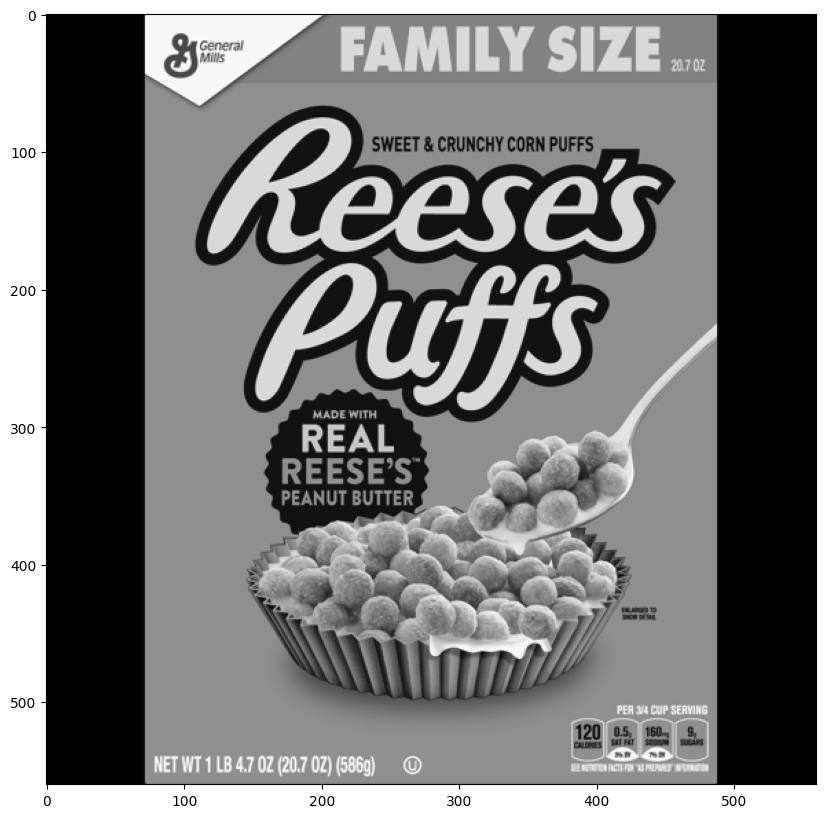

In [97]:
display(resses)

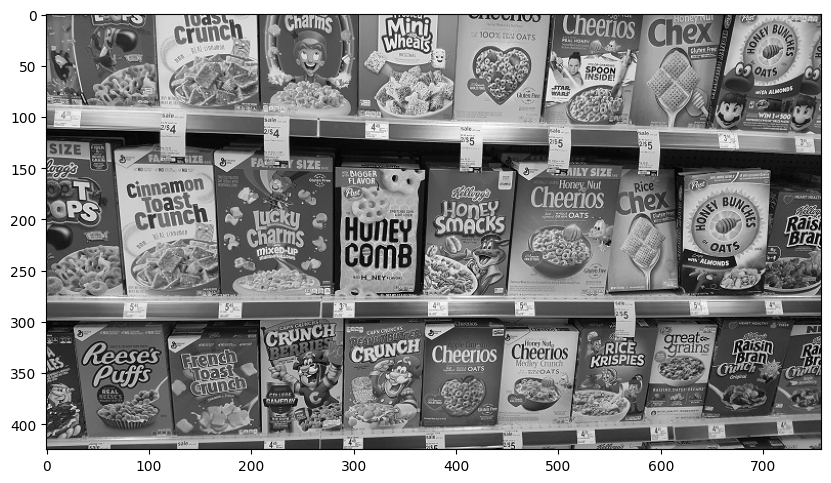

In [98]:
cereals = cv2.imread('/content/drive/MyDrive/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display(cereals)

In [99]:
orb = cv2.ORB_create()

In [100]:
kp1, des1 = orb.detectAndCompute(resses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [101]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

In [102]:
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)

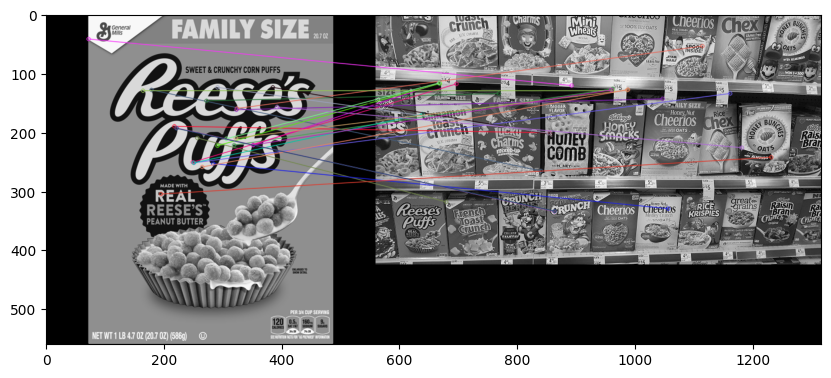

In [103]:
resses_match = cv2.drawMatches(
    resses, kp1,
    cereals, kp2,
    matches[0:25],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

display(resses_match)

In [104]:
sift = cv2.xfeatures2d.SIFT_create()

In [105]:
kp1,des1 = sift.detectAndCompute(resses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [106]:
bf = cv2.BFMatcher()

In [107]:
matches = bf.knnMatch(des1, des2, k= 2)

In [108]:
good = []
for match1, match2 in matches:
  if match1.distance < 0.75 * match2.distance :
    good.append([match1])

In [109]:
sift_matches = cv2.drawMatchesKnn(resses, kp1, cereals ,kp2 , good, None, flags = 2)

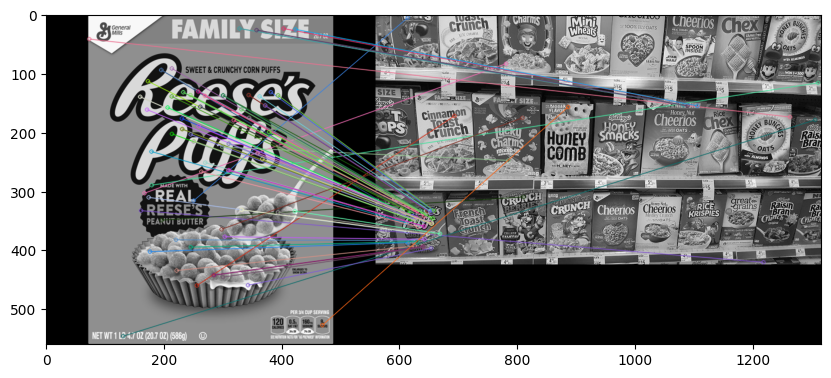

In [110]:
display(sift_matches)

In [111]:
sift = cv2.xfeatures2d.SIFT_create()

In [112]:
kp1,des1 = sift.detectAndCompute(resses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [113]:
FLANN_INDEX_TREE = 0
index_params = dict(algorithm = FLANN_INDEX_TREE, trees = 5)
search_params = dict(checks = 50)

In [114]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [115]:
matches = flann.knnMatch(des1, des2, k= 2)

In [116]:
#can be there or not
matches_mask = [[0,0] for i in range(len(matches))]

In [117]:
for i,(match1, match2) in enumerate(matches):
  if match1.distance < 0.75 * match2.distance :
    matches_mask[i] = [1,0]

In [118]:
good = []
for match1, match2 in matches:
  if match1.distance < 0.75 * match2.distance :
    good.append([match1])

In [119]:
flann_matches = cv2.drawMatchesKnn(resses, kp1, cereals ,kp2 , good, None, flags = 2)

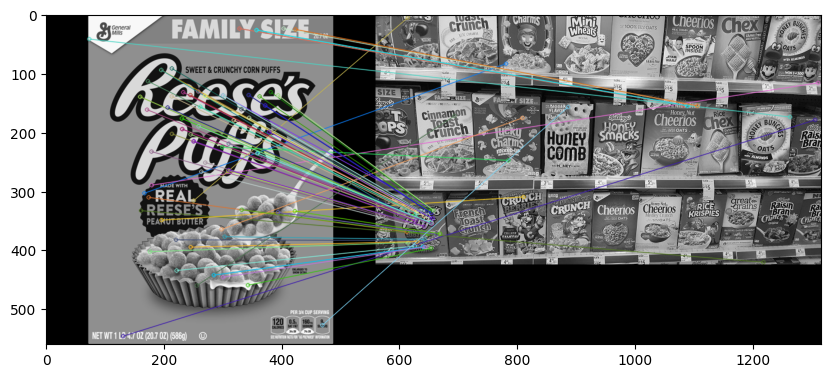

In [120]:
display(flann_matches)

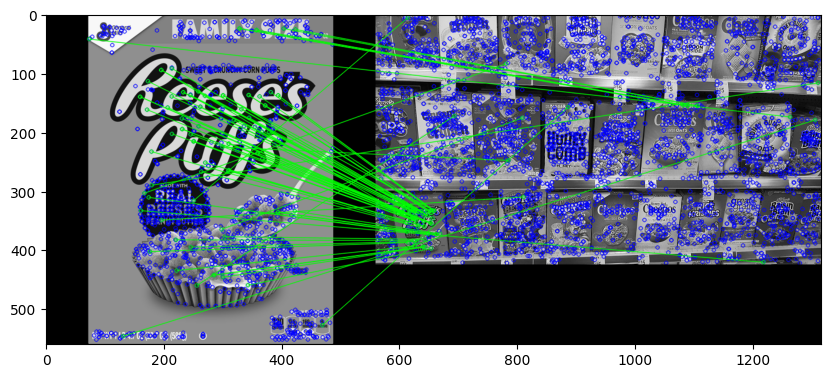

In [123]:
draw_params = dict(
    matchColor=(0,255,0),
    singlePointColor=(0,0,255),
    matchesMask=matches_mask,
    flags=0
)

flann_matches_mask = cv2.drawMatchesKnn(
    resses, kp1,
    cereals, kp2,
    matches,
    None,          # ✅ outImg required
    **draw_params  # ✅ unpack dictionary
)

display(flann_matches_mask)